In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("data/raw/train.csv", parse_dates=["date"], date_format="%Y-%m-%d")

In [3]:
df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [4]:
df.groupby("family")["sales"].sum().sort_values(ascending=False).head()

family
GROCERY I    3.434627e+08
BEVERAGES    2.169545e+08
PRODUCE      1.227047e+08
CLEANING     9.752129e+07
DAIRY        6.448771e+07
Name: sales, dtype: float64

In [5]:
product_family = "GROCERY I"

In [6]:
# Select one product family
df = df[df["family"] == product_family]

In [7]:
# Group sales per date to get daily sales
df = df.groupby("date")["sales"].sum().reset_index()

<Axes: xlabel='date'>

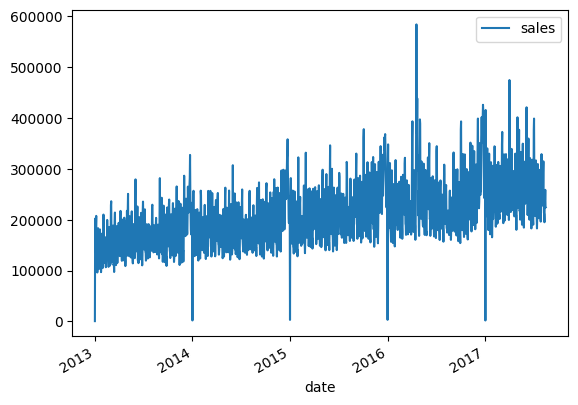

In [8]:
df.plot(x="date", y="sales")

In [9]:
df_2013_2015 = df[df["date"].dt.year <= 2015]
df_2016 = df[df["date"].dt.year == 2016]

In [10]:
df_2013_2015.to_csv("data/preprocessed/store_sales_2013_2015.csv", index=False)
df_2016.to_csv("data/preprocessed/store_sales_2016.csv", index=False)